## Goal:
Predict Probability of Default (PD) from historical transaction & credit data
- Convert PD into Credit Score (300–850)
- Generate actionable AI suggestions

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("credit_risk_dataset.csv")

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df.shape

(32581, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
# Fill missing values with median
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_28904\152325173.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
C:\Users\prash\AppData\Local\Temp\ipykernel_28904\152325173.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [9]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

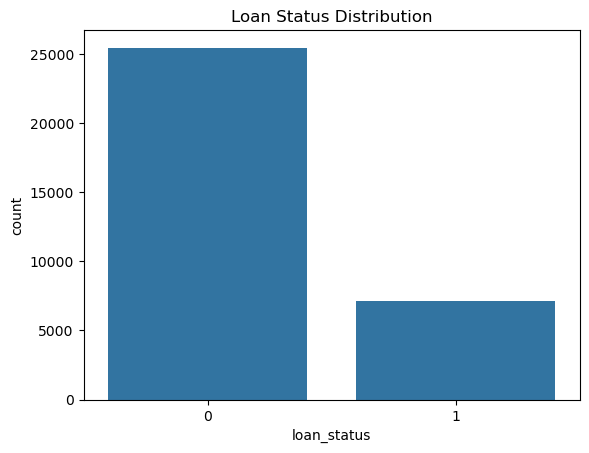

In [10]:
sns.countplot(x="loan_status", data=df)
plt.title("Loan Status Distribution")
plt.show()

loan_status
- 0 → Non-defaulter (GOOD customer)
- 1 → Defaulter (BAD customer)

✅ Interpretation
0 = Good borrower
- Paid loan on time
- Low risk
- Bank is happy 😄

1 = Bad borrower
- Defaulted on loan
- High risk
- Bank loses money 💸

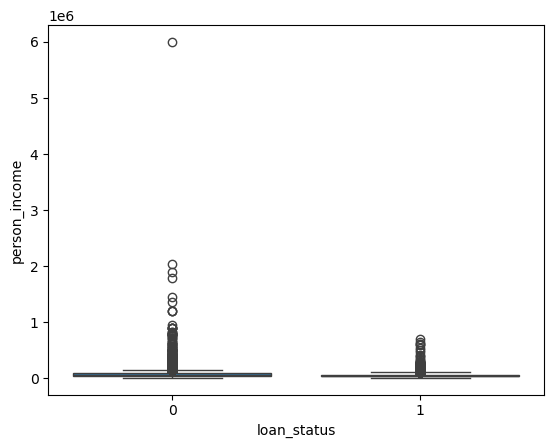

In [11]:
sns.boxplot(x="loan_status", y="person_income", data=df)
plt.show()

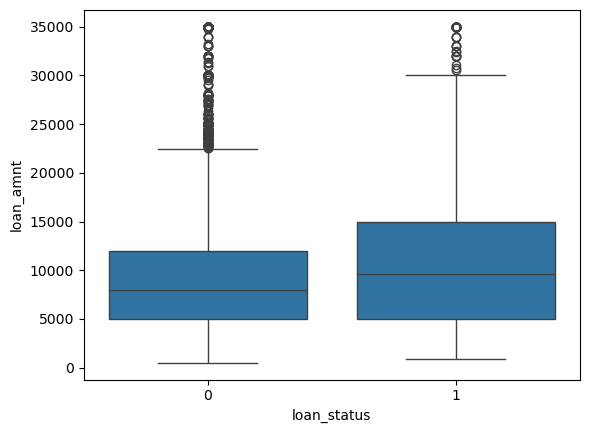

In [12]:
sns.boxplot(x="loan_status", y="loan_amnt", data=df)
plt.show()

### 🔗 What Is Correlation?

Correlation measures the relationship between two numerical variables.

It tells us:
- Direction → do they move together or opposite?
- Strength → how strong that relationship is

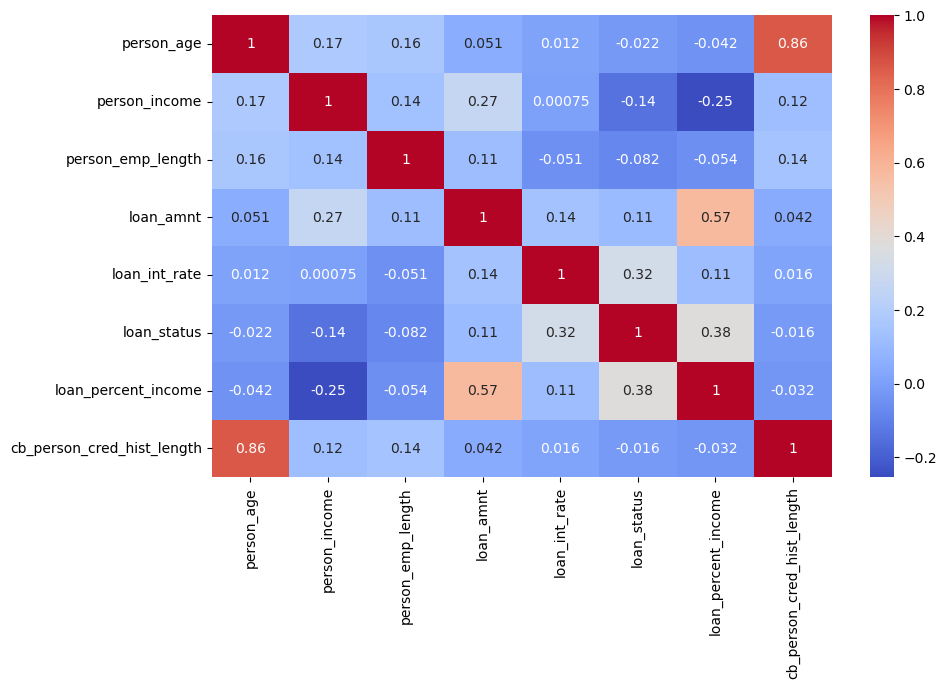

In [13]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [14]:
categorical_cols = [
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "cb_person_default_on_file"
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [33]:
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True


In [15]:
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1: Logistic Regression
📘 Theory
- Linear model
- Uses Sigmoid function
- Outputs probability of default
- Easy to interpret
- Baseline model in credit risk

In [18]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8674236611938009
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.77      0.56      0.65      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.78      6517
weighted avg       0.86      0.87      0.86      6517



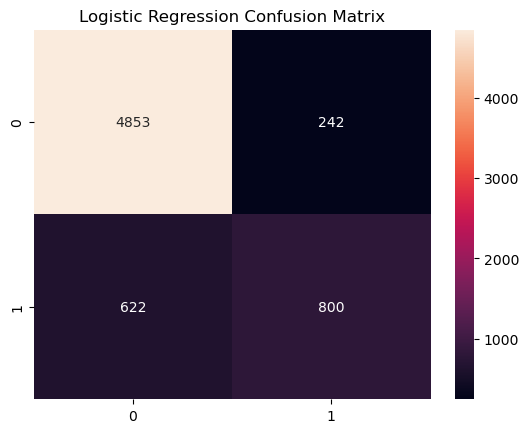

In [20]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

#### Step-by-step interpretation

✅ True Negatives (TN = 4853)
- Actual: Non-defaulter
- Predicted: Non-defaulter
- ✔ Correct decision
- Bank safely gives loan

⚠ False Positives (FP = 242)
- Actual: Non-defaulter
- Predicted: Defaulter
- ❌ Good customer rejected
- Business impact: lost opportunity, but no loss

🚨 False Negatives (FN = 622) ← MOST IMPORTANT
- Actual: Defaulter
- Predicted: Non-defaulter
- ❌ Bank gives loan to a bad customer
- Direct financial loss

✅ True Positives (TP = 800)
- Actual: Defaulter
- Predicted: Defaulter
- ✔ Correctly blocked risky customer

### Model 2: XGBoost Classifier
📘 Theory
- Ensemble of decision trees
- Uses gradient boosting
Handles:
- Non-linear relationships
- Feature interactions
- Usually outperforms logistic regression

In [21]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9327911615774129
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.97      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.94      0.93      0.93      6517



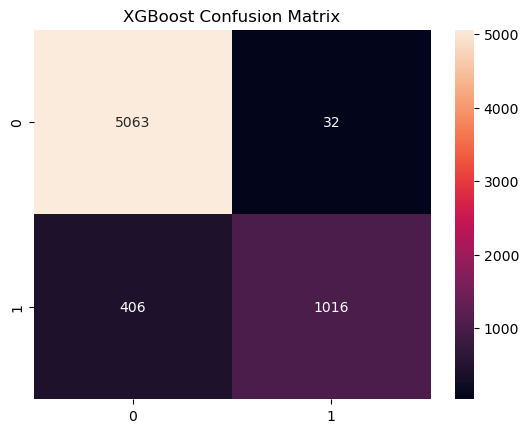

In [23]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d")
plt.title("XGBoost Confusion Matrix")
plt.show()

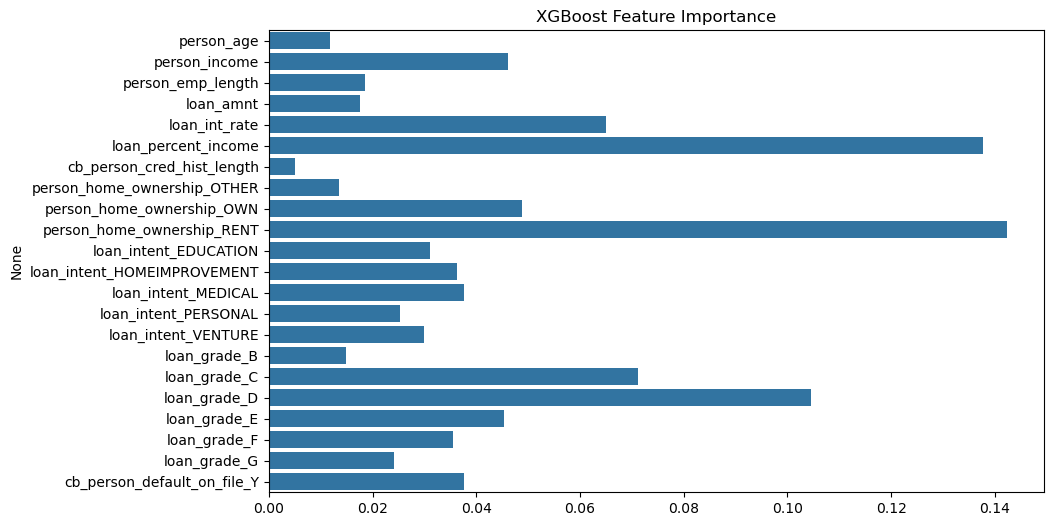

In [24]:
xgb_model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(
    x=xgb_model.feature_importances_,
    y=X.columns
)
plt.title("XGBoost Feature Importance")
plt.show()

### Model Comparison
| Model               | Pros                      | Cons               |
| ------------------- | ------------------------- | ------------------ |
| Logistic Regression | Interpretable, fast       | Linear only        |
| XGBoost             | High accuracy, non-linear | Less interpretable |


In [28]:
feature_names = X.columns

In [30]:
new_customer = {
    "person_age": 30,
    "person_income": 60000,
    "person_emp_length": 5,
    "loan_amnt": 15000,
    "loan_int_rate": 12.5,
    "loan_percent_income": 0.25,
    "cb_person_cred_hist_length": 6,
    "person_home_ownership_RENT": 1,
    "loan_intent_MEDICAL": 1,
    "loan_grade_C": 1,
    "cb_person_default_on_file_Y": 0
}

# Create empty dataframe with ALL training columns
new_df = pd.DataFrame(0, index=[0], columns=feature_names)

# Fill known values
for key, value in new_customer.items():
    new_df[key] = value


In [31]:
new_scaled = scaler.transform(new_df)

log_pred = log_model.predict(new_scaled)
xgb_pred = xgb_model.predict(new_df)

log_pred, xgb_pred

(array([0]), array([0]))

##### Real-world banking decision logic 🏦

In production:
- If XGBoost predicts 1 → Reject loan
- If models disagree → Manual verification
- If both predict 0 → Approve loan

Testing with Different Input

In [ ]:
# Test inputs
customer_medium = {
    "person_age": 29,
    "person_income": 45000,
    "person_emp_length": 3,
    "loan_amnt": 18000,
    "loan_int_rate": 14.5,
    "loan_percent_income": 0.35,
    "cb_person_cred_hist_length": 4,
    "person_home_ownership_RENT": 1,
    "loan_intent_MEDICAL": 1,
    "loan_grade_C": 1,
    "cb_person_default_on_file_Y": 0
}

customer_young_rich = {
    "person_age": 24,
    "person_income": 90000,
    "person_emp_length": 2,
    "loan_amnt": 20000,
    "loan_int_rate": 10.2,
    "loan_percent_income": 0.22,
    "cb_person_cred_hist_length": 3,
    "person_home_ownership_RENT": 1,
    "loan_intent_VENTURE": 1,
    "loan_grade_B": 1,
    "cb_person_default_on_file_Y": 0
}



In [52]:
# must match training features
feature_names = X.columns  

new_df = pd.DataFrame(0, index=[0], columns=feature_names)

for k, v in customer_medium.items():
    if k in new_df.columns:
        new_df.loc[0, k] = v

new_df = new_df.astype(float)

log_pred = log_model.predict(scaler.transform(new_df))
xgb_pred = xgb_model.predict(new_df)

log_pred, xgb_pred

C:\Users\prash\AppData\Local\Temp\ipykernel_28904\2041664751.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[0, k] = v
C:\Users\prash\AppData\Local\Temp\ipykernel_28904\2041664751.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.35' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[0, k] = v


(array([1]), array([1]))